In [11]:
# Data Preparation Notebook

## Objectives
- Clean the data by removing outliers
- Handle any data quality issues  
- Create new features to improve predictions
- Prepare data for machine learning

## Inputs
- Raw data from inputs/datasets/collection/uk_housing_small.csv

## Outputs
- Cleaned dataset ready for modeling
- New engineered features

SyntaxError: invalid syntax (715566477.py, line 4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for nice plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Load the small dataset we created
df = pd.read_csv('../inputs/datasets/collection/uk_housing_small.csv')
print(f"Loaded {len(df)} properties")
print(f"Columns: {df.columns.tolist()}")

Loaded 20000 properties
Columns: ['Transaction unique identifier', 'Price', 'Date of Transfer', 'Property Type', 'Old/New', 'Duration', 'Town/City', 'District', 'County', 'PPDCategory Type', 'Record Status - monthly file only']


In [3]:
df.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{6146E264-E0D9-4C53-ACC8-48DB3954F80B},95200,2007-11-23 00:00,F,Y,L,SWINDON,SWINDON,SWINDON,A,A
1,{26EBD75A-D90F-411C-85E5-4D56F0F66484},199950,2013-06-28 00:00,S,Y,F,BINGLEY,BRADFORD,WEST YORKSHIRE,A,A
2,{E700C723-9426-4924-8D3F-1730EC3B2BCC},132000,2001-06-26 00:00,S,N,F,BRIGHTON,BRIGHTON AND HOVE,BRIGHTON AND HOVE,A,A
3,{677E0E46-8E8F-4560-AD93-07F72D5AE6D5},60000,1997-10-31 00:00,S,N,F,CAERPHILLY,CAERPHILLY,CAERPHILLY,A,A
4,{E2387F76-24EC-4A7E-8A27-220E500F0DC2},87000,1998-02-23 00:00,S,N,F,BEXLEYHEATH,BEXLEY,GREATER LONDON,A,A


In [4]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

if missing.sum() == 0:
    print("\nNo missing values found - data is complete!")
else:
    print(f"\nTotal missing values: {missing.sum()}")

Missing values per column:
Series([], dtype: int64)

No missing values found - data is complete!


In [5]:
# If there were missing values, we would handle them here
# For example:
# df = df.dropna()  # Remove rows with missing values
# or
# df['column'].fillna(df['column'].median(), inplace=True)  # Fill with median

print("No missing values to handle")

No missing values to handle


In [6]:
# Look at price distribution
print("Price Statistics Before Cleaning:")
print(df['Price'].describe())

Price Statistics Before Cleaning:
count    2.000000e+04
mean     1.805406e+05
std      4.217152e+05
min      1.750000e+03
25%      7.600000e+04
50%      1.300000e+05
75%      2.100000e+05
max      4.000000e+07
Name: Price, dtype: float64


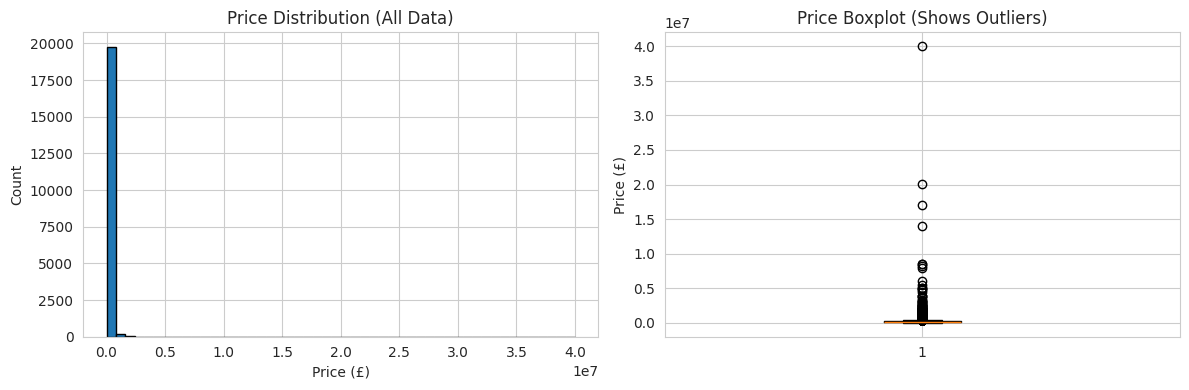

In [8]:
# Plot price distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=50, edgecolor='black')
plt.title('Price Distribution (All Data)')
plt.xlabel('Price (£)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.boxplot(df['Price'])
plt.title('Price Boxplot (Shows Outliers)')
plt.ylabel('Price (£)')

plt.tight_layout()
plt.show()

In [9]:
# Identify extreme outliers
print("Identifying outliers...")
print(f"Properties under £50,000: {len(df[df['Price'] < 50000])}")
print(f"Properties over £1,000,000: {len(df[df['Price'] > 1000000])}")
print(f"Properties over £2,000,000: {len(df[df['Price'] > 2000000])}")

Identifying outliers...
Properties under £50,000: 2321
Properties over £1,000,000: 126
Properties over £2,000,000: 40


In [10]:
# Remove extreme outliers
print(f"Original dataset: {len(df)} properties")

# Keep only properties between £50k and £1M
df_clean = df[(df['Price'] >= 50000) & (df['Price'] <= 1000000)].copy()

print(f"After removing outliers: {len(df_clean)} properties")
print(f"Removed: {len(df) - len(df_clean)} properties")

# Update df to use cleaned version
df = df_clean

Original dataset: 20000 properties
After removing outliers: 17553 properties
Removed: 2447 properties


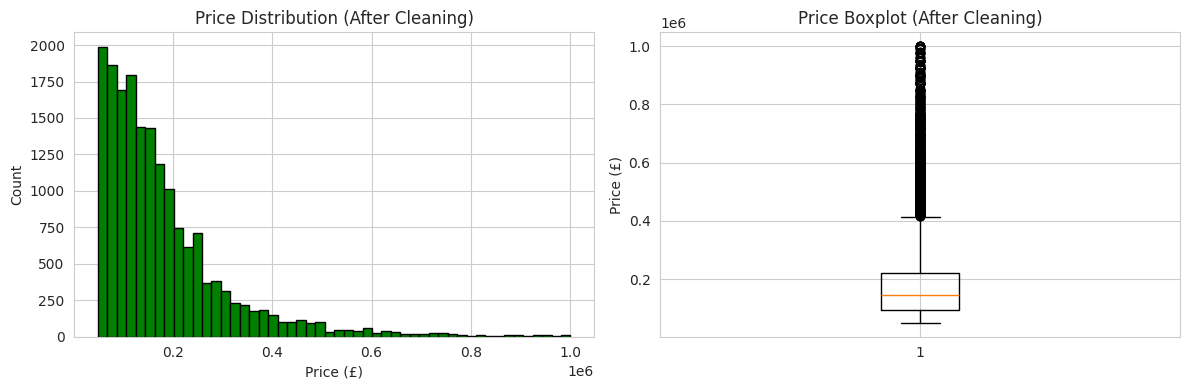


Price Statistics After Cleaning:
count      17553.000000
mean      181172.084031
std       131909.605908
min        50000.000000
25%        93000.000000
50%       145000.000000
75%       222000.000000
max      1000000.000000
Name: Price, dtype: float64


In [11]:
# Check price distribution after cleaning
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=50, edgecolor='black', color='green')
plt.title('Price Distribution (After Cleaning)')
plt.xlabel('Price (£)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.boxplot(df['Price'])
plt.title('Price Boxplot (After Cleaning)')
plt.ylabel('Price (£)')

plt.tight_layout()
plt.show()

print("\nPrice Statistics After Cleaning:")
print(df['Price'].describe())

In [12]:
# First, encode categorical features as numbers
print("Converting text categories to numbers...")

# Make a copy to work with
df_encoded = df.copy()

# Convert each category to numbers
df_encoded['Property_Type_Encoded'] = pd.Categorical(df['Property Type']).codes
df_encoded['County_Encoded'] = pd.Categorical(df['County']).codes
df_encoded['Old_New_Encoded'] = pd.Categorical(df['Old/New']).codes
df_encoded['Duration_Encoded'] = pd.Categorical(df['Duration']).codes

print("Basic encoding complete")

Converting text categories to numbers...
Basic encoding complete


In [13]:
# Create interaction feature
print("Creating interaction features...")

# Property type and age interaction (new terraced vs old terraced might differ)
df_encoded['Type_Age_Interaction'] = (
    df_encoded['Property_Type_Encoded'] * df_encoded['Old_New_Encoded']
)

print("Interaction feature created")

Creating interaction features...
Interaction feature created


In [14]:
# Create county price tier feature
print("Creating county price tier feature...")

# Calculate average price per county
county_avg_price = df.groupby('County')['Price'].mean()

# Create price tiers
def get_price_tier(county):
    avg_price = county_avg_price.get(county, 0)
    if avg_price < 250000:
        return 0  # Budget tier
    elif avg_price < 400000:
        return 1  # Mid tier
    else:
        return 2  # Premium tier

df_encoded['County_Price_Tier'] = df['County'].apply(get_price_tier)

print("County price tiers created")
print(f"Budget counties (tier 0): {(df_encoded['County_Price_Tier'] == 0).sum()}")
print(f"Mid counties (tier 1): {(df_encoded['County_Price_Tier'] == 1).sum()}")
print(f"Premium counties (tier 2): {(df_encoded['County_Price_Tier'] == 2).sum()}")

Creating county price tier feature...
County price tiers created
Budget counties (tier 0): 14212
Mid counties (tier 1): 3341
Premium counties (tier 2): 0


In [16]:
# Create property type rarity feature
print("Creating property type rarity feature...")

# Calculate how common each property type is
type_frequency = df['Property Type'].value_counts(normalize=True)

# Map to each property
df_encoded['Type_Rarity'] = df['Property Type'].map(type_frequency)

print("Property type rarity created")
print(f"Most common type frequency: {df_encoded['Type_Rarity'].max():.3f}")
print(f"Rarest type frequency: {df_encoded['Type_Rarity'].min():.3f}")

Creating property type rarity feature...
Property type rarity created
Most common type frequency: 0.280
Rarest type frequency: 0.004


In [17]:
#Check if new features make sense
print("Validating new features...")

# List all features
engineered_features = [
    'Property_Type_Encoded', 'County_Encoded', 'Old_New_Encoded', 
    'Duration_Encoded', 'Type_Age_Interaction', 'County_Price_Tier', 
    'Type_Rarity'
]

print("\nFeature summary:")
for feature in engineered_features:
    print(f"{feature}:")
    print(f"  Min: {df_encoded[feature].min():.2f}")
    print(f"  Max: {df_encoded[feature].max():.2f}")
    print(f"  Unique values: {df_encoded[feature].nunique()}")

Validating new features...

Feature summary:
Property_Type_Encoded:
  Min: 0.00
  Max: 4.00
  Unique values: 5
County_Encoded:
  Min: 0.00
  Max: 124.00
  Unique values: 125
Old_New_Encoded:
  Min: 0.00
  Max: 1.00
  Unique values: 2
Duration_Encoded:
  Min: 0.00
  Max: 1.00
  Unique values: 2
Type_Age_Interaction:
  Min: 0.00
  Max: 4.00
  Unique values: 5
County_Price_Tier:
  Min: 0.00
  Max: 1.00
  Unique values: 2
Type_Rarity:
  Min: 0.00
  Max: 0.28
  Unique values: 5


In [18]:
# Check correlation with price
print("Feature correlation with Price:")
correlations = {}
for feature in engineered_features:
    corr = df_encoded[feature].corr(df_encoded['Price'])
    correlations[feature] = corr
    print(f"{feature}: {corr:.3f}")

# Show which features are most important
sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print("\nFeatures ranked by correlation with price:")
for feature, corr in sorted_corr:
    print(f"{feature}: {corr:.3f}")

Feature correlation with Price:
Property_Type_Encoded: -0.232
County_Encoded: -0.078
Old_New_Encoded: 0.005
Duration_Encoded: -0.046
Type_Age_Interaction: -0.015
County_Price_Tier: 0.292
Type_Rarity: -0.067

Features ranked by correlation with price:
County_Price_Tier: 0.292
Property_Type_Encoded: -0.232
County_Encoded: -0.078
Type_Rarity: -0.067
Duration_Encoded: -0.046
Type_Age_Interaction: -0.015
Old_New_Encoded: 0.005
